Enter the polynomial degrees - 2 4 5 6
0.2810250823013685


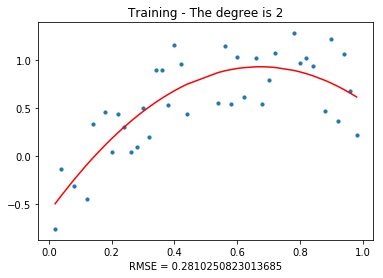

0.3353668256279671


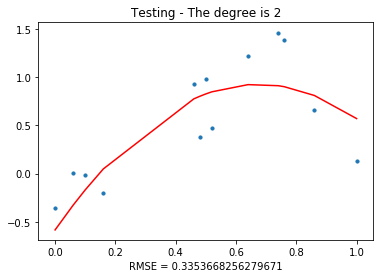

0.27586392926150943


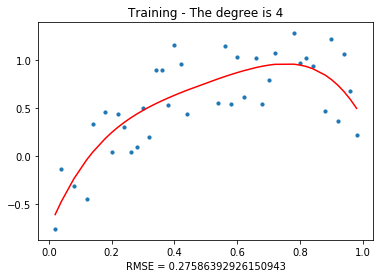

0.32564041972403057


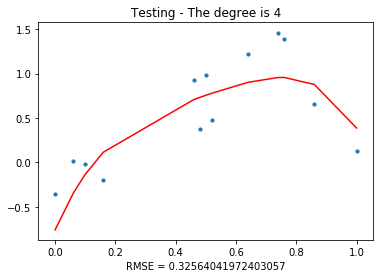

0.2718355256593602


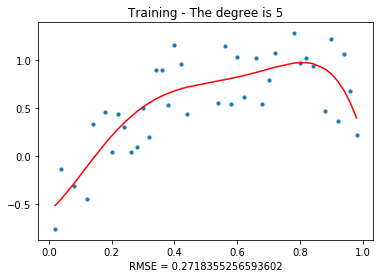

0.31382240524473004


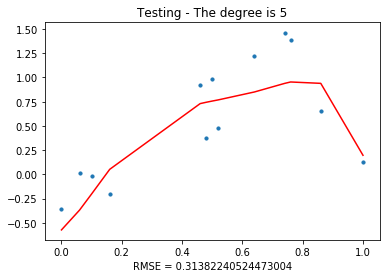

0.2696354516829276


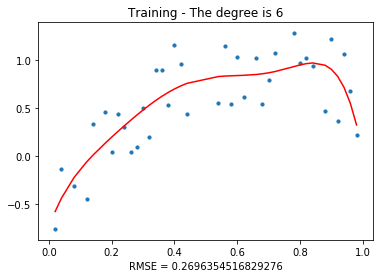

0.3394640071050339


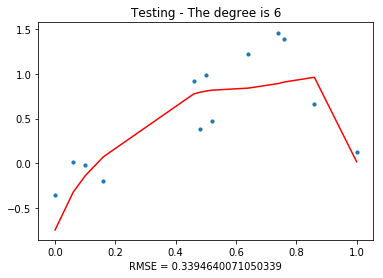

[0.2810250823013685, 0.27586392926150943, 0.2718355256593602, 0.2696354516829276]


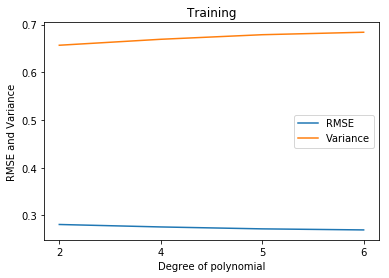

[0.3353668256279671, 0.32564041972403057, 0.31382240524473004, 0.3394640071050339]


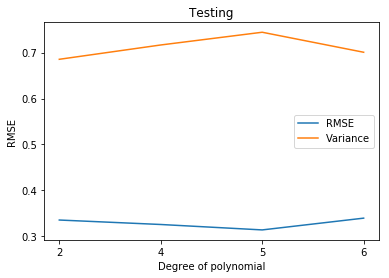

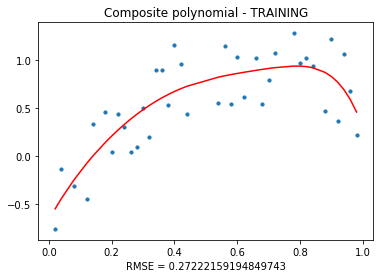

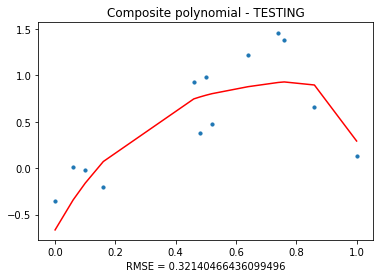

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score
from sklearn.model_selection import train_test_split

#DATA UNPACKING
fileopen = open('hw1data.txt') 
x,y = np.loadtxt(fileopen,usecols=(0,1), unpack=True)
#DIVIDING THE DATA INTO TRAINING AND TESTING
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

def bugFix(X1,Y1):
    zipXTrain = zip(X1,Y1)
    x_list = list(zipXTrain)
    x_list.sort()
    X1, Y1 = zip(*x_list)
    #RESHAPING AFTER FIX - TRAINING
    X1 = np.asarray(X1)
    X1 = np.reshape(X1,(-1,1))
    Y1 = np.asarray(Y1)
    Y1 = np.reshape(Y1,(-1,1))
    return X1, Y1

#THIS FIXES A BUG THE MESSES UP THE ORDER OF POINTS AFTER SPLIT - TRAINING
X_train, y_train = bugFix(X_train,y_train)
#THIS FIXES A BUG THE MESSES UP THE ORDER OF POINTS AFTER SPLIT - TESTING
X_test, y_test = bugFix(X_test,y_test)

rmse_arr = []
rmse_test = []
variance = []
variance_test = []
sum_test = X_test*0
sum_train = X_train*0


model = LinearRegression()
def poly_train(deg):
    polynomial_features = PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(X_train)
    model.fit(x_poly, y_train)
    y_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    rmse_arr.append(rmse)
    train_variance = (explained_variance_score(y_train,y_pred))
    variance.append(train_variance)
    print(rmse)
    plt.scatter(X_train, y_train, s=10)
    plt.plot(X_train, y_pred, color='r')
    plt.title("Training - The degree is "+str(deg))
    plt.xlabel("RMSE = "+str(rmse))
    plt.show()
    global sum_train
    sum_train = y_pred + sum_train

def poly_test(deg):
    polynomial_features = PolynomialFeatures(degree=deg)
    x_test = polynomial_features.fit_transform(X_test)
    y_testpred = model.predict(x_test)
    rmse_1 = np.sqrt(mean_squared_error(y_test,y_testpred))
    rmse_test.append(rmse_1)
    print(rmse_1)
    test_variance = (explained_variance_score(y_test,y_testpred))
    variance_test.append(test_variance)
    plt.title("Testing - The degree is "+str(deg))
    plt.scatter(X_test, y_test, s=10)
    plt.plot(X_test, y_testpred, color='r')
    plt.xlabel("RMSE = " + str(rmse_1))
    plt.show()
    global sum_test
    sum_test = y_testpred + sum_test

many = input("Enter the polynomial degrees - ").split(" ")
size = len(many) #EDIT THIS FOR THE NUMBER OF ESTIMATORS YOU ARE CREATING
newrmse = []
for i in many:
    newrmse.append(int(i))
    poly_train(int(i))
    poly_test(int(i))

#PLOTTING MSE on TRAINING
print (rmse_arr)
plt.plot(many,rmse_arr,label="RMSE")
plt.plot(many,variance,label="Variance")
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE and Variance')
plt.title("Training")
plt.legend()
plt.show()
#PLOTTING MSE on TESTING
print (rmse_test)
plt.plot(many,rmse_test,label="RMSE")
plt.plot(many,variance_test,label="Variance")
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE')
plt.title("Testing")
plt.legend()
plt.show()
#PLOTTING THE AVERAGES 1(E) - TRAINING
sum_train = sum_train/size
plt.scatter(X_train, y_train, s=10)
rmse_comp = np.sqrt(mean_squared_error(y_train,sum_train))
plt.plot(X_train, sum_train, color='r')
plt.title("Composite polynomial - TRAINING")
plt.xlabel("RMSE = "+ str(rmse_comp))
plt.show()
#PLOTTING THE AVERAGES 1(E) - TESTING
sum_test = sum_test/size
plt.scatter(X_test, y_test, s=10)
rmse_comp_test = np.sqrt(mean_squared_error(y_test,sum_test))
plt.plot(X_test, sum_test, color='r')
plt.title("Composite polynomial - TESTING")
plt.xlabel("RMSE = "+ str(rmse_comp_test))
plt.show()

In [2]:
plt.show()